# QRT ENS Data Challenge 2023 - Context

Contexte

Une multitude de facteurs influencent le prix de l'electricité au quotidien. Des variations locales du climat pourront à la fois affecter la production et la demande électrique par exemple. Des phénomènes à plus long terme, comme le réchauffement climatique, auront également un impact évident. Des évènements géopolitiques, comme la guerre en Ukraine, peuvent en parallèle faire bouger le prix des matières premières qui sont clefs dans la production d'électricité, sachant que chaque pays s'appuie sur un mix énergétique qui lui est propre (nucléaire, solaire, hydrolique, gaz, charbon, etc). De plus chaque pays peut importer/exporter de l'électricité avec ses voisins au travers de marchés dynamiques, comme en Europe. Ces différents élements rendent assez complexe la modélisation du prix de l'électricité par pays.

But

L'objectif est de modéliser le prix l'électricité à partir de données météorologiques, énergétiques (matières premières) et commerciales pour deux pays européens - la France et l'Allemagne. On soulignera que c'est ici un problème d'explication des prix par d'autres variables concomitantes et non pas un problème de prédiction.

Plus précisément le but est de construire un modèle qui, à partir de ces variables explicatives, renvoie une bonne estimation de la variation journalière du prix de contrats à terme (dits futures) sur l'électricité, en France ou en Allemagne. Ces contrats permettent d'acheter (ou de vendre) une quantité donnée d'électricité à un prix fixé par le contrat et qui sera livrée à une date future spécifiée (maturité du contrat). Les futures sont donc des instruments financiers qui donnent une estimation de la valeur de l'électricité au moment de la maturité du contrat à partir des conditions actuelles du marché - ici, on se restreint à des futures à courte maturité (24h). Soulignons que l'échange de futures sur l'electricité est un marché dynamique en Europe.

Concernant les variables explicatives, les participants auront accès pour chaque pays à des mesures journalières de données météorologiques (température, quantité de pluie et force du vent), de production énergétique (variations des prix de différentes matières premières / énergies) et d'utilisation de l'électricité (consommation, échanges entre ces deux pays, import-export avec le reste de l'Europe).

La fonction de score (métrique) utilisée est la corrélation de Spearman entre la réponse du participant et les variations réelles du prix des futures contenues dans le jeu de données de test.

N'hésitez pas à consulter notre forum dédié et notre page LinkedIn pour plus d'information sur le challenge et sur QRT.

Description des données

Trois jeux de données sont fournis au format csv : les données d'entrainement en entrée X_train et en sortie Y_train, et les données test en entrée X_test.

NB : Les données d'entrée X_train et X_test représentent les même variables explicatives mais sur deux périodes de temps différentes.

La colonne ID de X_train et Y_train est identique, et de même pour les données test. Les données d'entrainement fournissent 1494 lignes, et les données de test en contiennent 654.

Les données d'entrée possèdent 35 colonnes :

ID : Identifiant d'indexe unique, associé à un jour (DAY_ID) et un pays (COUNTRY),
DAY_ID : Identifiant du jour - les dates ont été annonymisées en préservant la structure des données,
COUNTRY : Identifiant du pays - DE = Allemagne, FR = France,

et composées ensuite de variations journalières du prix de matières premières,

GAS_RET : Gaz en Europe,
COAL_RET : Charbon en Europe,
CARBON_RET : Futures sur les emissions carbone,

de mesures météorologiques (journalières, dans le pays x),

x_TEMP : Temperature,
x_RAIN : Pluie,
x_WIND : Vent,

de mesures de productions d'energie (journalière, dans le pays x),

x_GAS : Gaz naturel,
x_COAL : Charbon,
x_HYDRO : Hydrolique,
x_NUCLEAR : Nucléaire,
x_SOLAR : Photovoltaïque,
x_WINDPOW : Eolienne,
x_LIGNITE : Lignite,

et de mesures d'utilisation électrique (journalières, dans le pays x),

x_CONSUMPTON : Electricité totale consommée,
x_RESIDUAL_LOAD : Electricité consommée après utilisation des énergies renouvelables,
x_NET_IMPORT: Electricité importée depuis l'Europe,
x_NET_EXPORT: Electricité exportée vers l'Europe,
DE_FR_EXCHANGE: Electricité échangée entre Allemagne et France,
FR_DE_EXCHANGE: Electricité échangée entre France et Allemagne.

Les données en sortie se composent de deux colonnes :

ID : Identifiant unique - le même que celui des données d'entrée,
TARGET : Variation journalière du prix de futures d'électricité (maturité 24h).

Les solutions envoyées par les participants devront être structurées comme les données en sortie, à savoir un fichier au format csv avec deux colonnes ID and TARGET, avec comme valeurs ID les valeurs correspondantes à la colonne ID de X_test. Un exemple de fichier contenant une solution aléatoire est fourni - Cf. aussi le notebook fourni en materiel supplémentaire.

Description du benchmark

Le benchmark pour ce challenge consiste en une simple régression linéaire, après un léger nettoyage des données : les valeurs manquantes (NaN) ont été remplacées par des zéros et la colonne COUNTRY a été supprimée - en d'autres termes, nous avons utilisé un modèle identique pour la France et l'Allemagne.

Le score public obtenu pour ce benchmark est de 15.86%. Un notebook contenant la génération du benchmark et quelques discussions est disponible en "supplementary files" que vous trouverez sur cette page (colonne de droite).

## Libraries

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X_train = pd.read_csv('X_train.csv')
Y_train = pd.read_csv('Y_train.csv')
X_test = pd.read_csv('X_test.csv')

X_train.head()

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
0,1054,206,FR,0.210099,-0.427458,-0.606523,0.606523,NaN,0.692860,NaN,...,-0.444661,-0.172680,-0.556356,-0.790823,-0.283160,-1.069070,-0.063404,0.339041,0.124552,-0.002445
1,2049,501,FR,-0.022399,-1.003452,-0.022063,0.022063,-0.573520,-1.130838,0.573520,...,-1.183194,-1.240300,-0.770457,1.522331,0.828412,0.437419,1.831241,-0.659091,0.047114,-0.490365
2,1924,687,FR,1.395035,1.978665,1.021305,-1.021305,-0.622021,-1.682587,0.622021,...,1.947273,-0.480700,-0.313338,0.431134,0.487608,0.684884,0.114836,0.535974,0.743338,0.204952
3,297,720,DE,-0.983324,-0.849198,-0.839586,0.839586,-0.270870,0.563230,0.270870,...,-0.976974,-1.114838,-0.507570,-0.499409,-0.236249,0.350938,-0.417514,0.911652,-0.296168,1.073948
4,1101,818,FR,0.143807,-0.617038,-0.924990,0.924990,NaN,0.990324,NaN,...,-0.526267,-0.541465,-0.424550,-1.088158,-1.011560,0.614338,0.729495,0.245109,1.526606,2.614378


# NOn exo

Garde seulement les non exotiques

In [121]:
day_counts_train = X_train['DAY_ID'].value_counts()
day_counts_test = X_test['DAY_ID'].value_counts()

# Create the lone_day feature (1 if alone, 0 if paired)
X_train['LONE_DAY'] = X_train['DAY_ID'].map(day_counts_train).apply(lambda x: 1 if x == 1 else 0)
X_test['LONE_DAY'] = X_test['DAY_ID'].map(day_counts_test).apply(lambda x: 1 if x == 1 else 0)

# Filter to keep only rows where LONE_DAY equals 0 (paired days)
X_train = X_train[X_train['LONE_DAY'] == 0]
X_test = X_test[X_test['LONE_DAY'] == 0]

# Also filter Y_train to match the filtered X_train IDs
Y_train = Y_train[Y_train['ID'].isin(X_train['ID'])]

# Drop the LONE_DAY column as it's no longer needed
X_train = X_train.drop('LONE_DAY', axis=1)
X_test = X_test.drop('LONE_DAY', axis=1)

# processing

Garde seulement les FR

In [2]:
# Filter data for just Germany (DE)
# Create masks for Germany
DE_train_mask = X_train['COUNTRY'] == 'FR'
DE_test_mask = X_test['COUNTRY'] == 'FR'

# Get the IDs for German data points
german_train_ids = X_train.loc[DE_train_mask, 'ID']
german_test_ids = X_test.loc[DE_test_mask, 'ID']

# Filter X_train and X_test
X_train_DE = X_train[DE_train_mask].copy()
X_test_DE = X_test[DE_test_mask].copy()

# Filter Y_train based on the German IDs from X_train
Y_train_DE = Y_train[Y_train['ID'].isin(german_train_ids)].copy()

# Display information about filtered datasets
print(f"Original dataset sizes: X_train: {len(X_train)}, X_test: {len(X_test)}, Y_train: {len(Y_train)}")
print(f"Filtered dataset sizes: X_train_DE: {len(X_train_DE)}, X_test_DE: {len(X_test_DE)}, Y_train_DE: {len(Y_train_DE)}")

# Optionally set these as the main dataframes for subsequent cells
X_train = X_train_DE
X_test = X_test_DE
Y_train = Y_train_DE

# Display the first few rows of each filtered dataframe
X_train.describe()

Original dataset sizes: X_train: 1494, X_test: 654, Y_train: 1494
Filtered dataset sizes: X_train_DE: 851, X_test_DE: 365, Y_train_DE: 851


,ID,DAY_ID,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
count,851.000000,851.000000,851.000000,851.000000,826.000000,826.000000,727.000000,781.000000,727.000000,781.000000,...,851.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,851.000000,851.000000,851.000000
mean,1532.453584,597.393655,0.463432,0.033707,-0.124405,0.124405,-0.193123,-0.029763,0.193123,0.029763,...,-0.087124,-0.037563,0.023706,0.016652,0.026257,0.012129,0.002481,0.039947,0.069333,0.074805
std,352.601046,348.174248,0.664918,0.943071,0.955788,0.955788,0.976871,1.060127,0.976871,1.060127,...,0.922673,0.969453,1.034275,1.024354,1.026540,0.992888,1.008070,1.091868,1.043115,1.096573
min,933.000000,0.000000,-2.265563,-1.462350,-2.856874,-2.634831,-2.464849,-2.825331,-2.279619,-1.951516,...,-1.678936,-2.128531,-1.726420,-1.880419,-1.895319,-4.549638,-5.787097,-5.349463,-5.706442,-4.281790
25%,1222.500000,295.000000,0.027082,-0.699925,-0.838858,-0.638150,-0.938455,-0.806179,-0.516391,-0.819463,...,-0.768812,-0.633376,-0.497641,-0.681840,-0.725287,-0.618340,-0.639210,-0.647117,-0.459531,-0.530523
50%,1525.000000,596.000000,0.410629,-0.365601,-0.146061,0.146061,-0.244606,0.158648,0.244606,-0.158648,...,-0.409541,-0.268040,-0.226417,-0.358441,-0.313788,-0.009017,-0.012600,0.000000,0.071501,0.054056
75%,1839.500000,894.500000,0.967994,0.739198,0.638150,0.838858,0.516391,0.819463,0.938455,0.806179,...,0.492683,0.335237,0.156147,0.508366,0.560115,0.674081,0.698028,0.655334,0.647094,0.633048
max,2146.000000,1215.000000,2.033851,3.300640,2.634831,2.856874,2.279619,1.951516,2.464849,2.825331,...,2.918326,7.756118,9.473201,5.085624,4.965028,2.858758,2.817239,5.674778,3.746576,5.471818


# Data processing / Handling missing values

In [3]:

from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy.stats import spearmanr
import numpy as np

import matplotlib.pyplot as plt


# Create a time series based on DAY_ID to use for interpolation
X_train_sorted = X_train.sort_values(['COUNTRY', 'DAY_ID'])
X_test_sorted = X_test.sort_values(['COUNTRY', 'DAY_ID'])

# Interpolate missing values using polynomial interpolation for each country
X_train_interpolated = X_train.copy()
X_test_interpolated = X_test.copy()

# Get numeric columns for interpolation
numeric_cols = X_train.columns[3:]

# Interpolate by country using polynomial interpolation
for country in ['DE', 'FR']:
    # Create masks for each country
    train_mask = X_train['COUNTRY'] == country
    test_mask = X_test['COUNTRY'] == country
    
    # For training data - interpolate by polynomial degree 3 where possible
    for col in numeric_cols:
        # Sort by DAY_ID for proper interpolation
        temp_df = X_train_sorted[train_mask].copy()
        # Apply polynomial interpolation
        X_train_interpolated.loc[train_mask, col] = temp_df[col].interpolate(
            method='polynomial', order=3, limit_direction='both'
        )
    
    # For test data - interpolate by polynomial degree 3 where possible
    for col in numeric_cols:
        # Sort by DAY_ID for proper interpolation
        temp_df = X_test_sorted[test_mask].copy()
        # Apply polynomial interpolation
        X_test_interpolated.loc[test_mask, col] = temp_df[col].interpolate(
            method='polynomial', order=3, limit_direction='both'
        )

# Fill any remaining NaN values with 0
X_train_interpolated = X_train_interpolated.fillna(0)
X_test_interpolated = X_test_interpolated.fillna(0)

# Update X_train and X_test with the interpolated values
X_train = X_train_interpolated
X_test = X_test_interpolated


# Create a Spearman correlation scorer
def spearman_score(y_true, y_pred):
    return spearmanr(y_true, y_pred)[0]

spearman_scorer = make_scorer(spearman_score)






# Verify imputation
print("\nRemaining missing values in X_train after imputation:")
print(X_train.isna().sum())
print("\nRemaining missing values in X_test after imputation:")
print(X_test.isna().sum())


Remaining missing values in X_train after imputation:
ID                  0
DAY_ID              0
COUNTRY             0
DE_CONSUMPTION      0
FR_CONSUMPTION      0
DE_FR_EXCHANGE      0
FR_DE_EXCHANGE      0
DE_NET_EXPORT       0
FR_NET_EXPORT       0
DE_NET_IMPORT       0
FR_NET_IMPORT       0
DE_GAS              0
FR_GAS              0
DE_COAL             0
FR_COAL             0
DE_HYDRO            0
FR_HYDRO            0
DE_NUCLEAR          0
FR_NUCLEAR          0
DE_SOLAR            0
FR_SOLAR            0
DE_WINDPOW          0
FR_WINDPOW          0
DE_LIGNITE          0
DE_RESIDUAL_LOAD    0
FR_RESIDUAL_LOAD    0
DE_RAIN             0
FR_RAIN             0
DE_WIND             0
FR_WIND             0
DE_TEMP             0
FR_TEMP             0
GAS_RET             0
COAL_RET            0
CARBON_RET          0
dtype: int64

Remaining missing values in X_test after imputation:
ID                  0
DAY_ID              0
COUNTRY             0
DE_CONSUMPTION      0
FR_CONSUMPTION      

C:\Users\thoma\AppData\Local\Temp\ipykernel_17532\2893084605.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = X_train_sorted[train_mask].copy()
C:\Users\thoma\AppData\Local\Temp\ipykernel_17532\2893084605.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = X_train_sorted[train_mask].copy()
C:\Users\thoma\AppData\Local\Temp\ipykernel_17532\2893084605.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = X_train_sorted[train_mask].copy()
C:\Users\thoma\AppData\Local\Temp\ipykernel_17532\2893084605.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = X_train_sorted[train_mask].copy()
C:\Users\thoma\AppData\Local\Temp\ipykernel_17532\2893084605.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = X_train_sorted[train_mask].copy()
C:\Users\thoma\AppData\Local\Temp\ipykernel_17532\

# Features Engineering

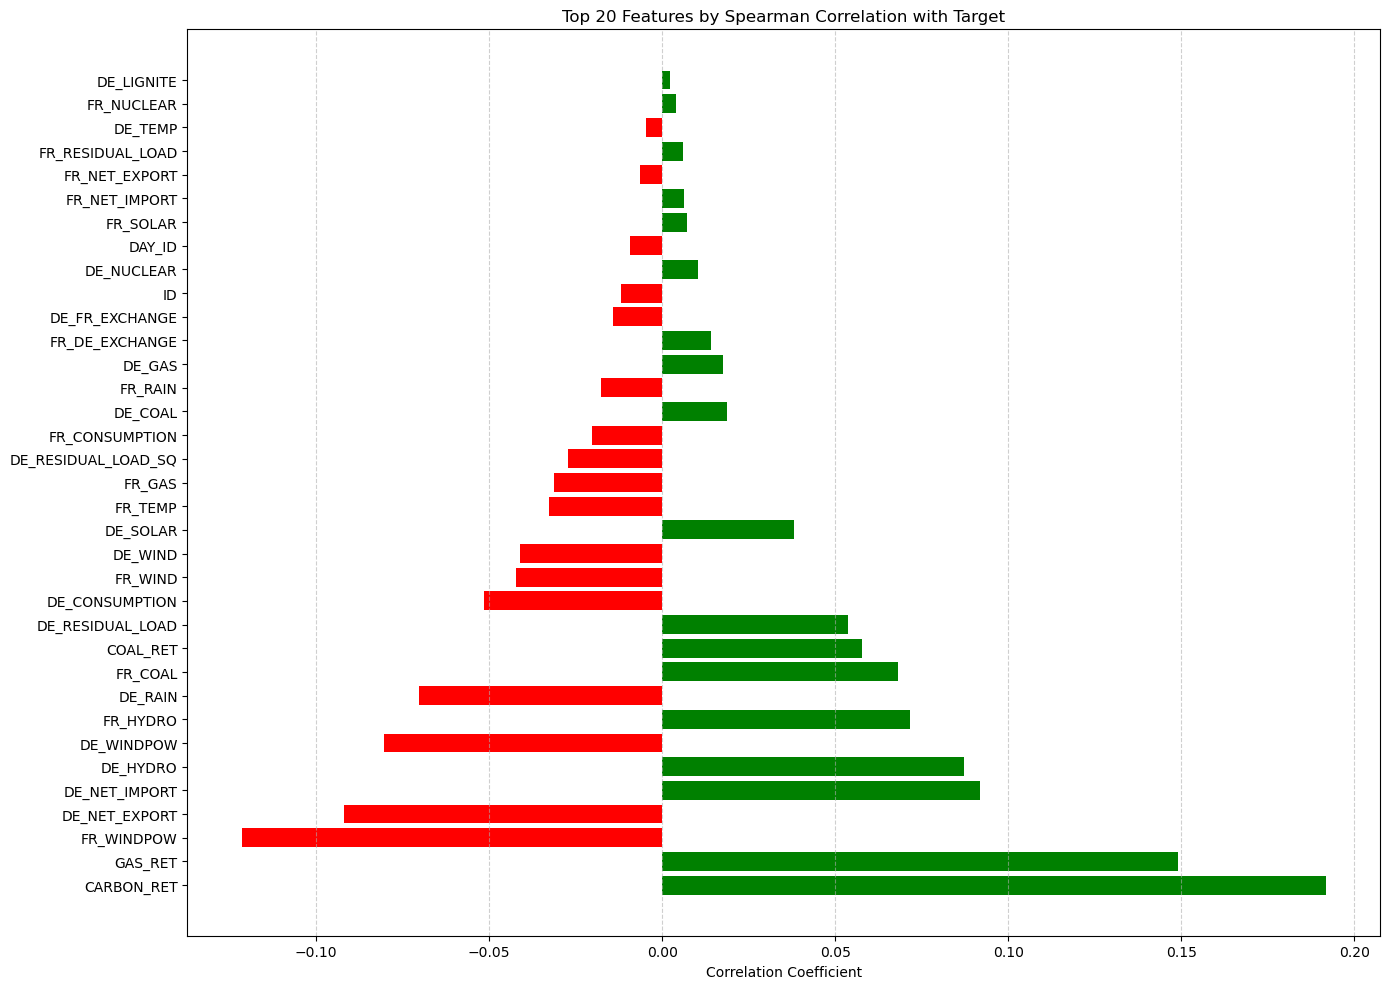

In [4]:
from sklearn.cluster import KMeans



X_train_prep = X_train.copy()
X_test_prep = X_test.copy()

# Create dummy variables for COUNTRY
encoder = OneHotEncoder(sparse_output=False, drop='first', categories=[['FR', 'DE']])
country_encoded_train = encoder.fit_transform(X_train_prep[['COUNTRY']])
country_encoded_test = encoder.transform(X_test_prep[['COUNTRY']])

# Drop non-feature columns and add encoded country
# X_train_features = X_train_prep.drop(['ID', 'DAY_ID', 'COUNTRY'], axis=1)
X_train_features = X_train_prep.drop(['COUNTRY'], axis=1)
# X_train_features = X_train_prep.drop(['ID', 'DAY_ID'], axis=1)
# X_test_features = X_test_prep.drop(['ID', 'DAY_ID', 'COUNTRY'], axis=1)
X_test_features = X_test_prep.drop(['COUNTRY'], axis=1)


# Add the encoded country column (only DE since FR is the reference)
# X_train_features['COUNTRY_DE'] = country_encoded_train
# X_test_features['COUNTRY_DE'] = country_encoded_test



# Get target values
y_train = Y_train['TARGET']



# Squared terms for important variables
X_train_features['DE_RESIDUAL_LOAD_SQ'] = X_train_features['DE_RESIDUAL_LOAD']**2
X_test_features['DE_RESIDUAL_LOAD_SQ'] = X_test_features['DE_RESIDUAL_LOAD']**2



# Calculate correlations with target for all features
correlations = pd.DataFrame({
    'Feature': X_train_features.columns,
    'Pearson_Correlation': [X_train_features[col].corr(y_train) for col in X_train_features.columns],
    'Spearman_Correlation': [X_train_features[col].corr(y_train, method='spearman') for col in X_train_features.columns]
})

# Sort by absolute value of Spearman correlation
correlations['Abs_Spearman'] = correlations['Spearman_Correlation'].abs()
correlations = correlations.sort_values('Abs_Spearman', ascending=False)

# Plot top 20 features by correlation magnitude
plt.figure(figsize=(14, 10))
top_features = correlations.head(42)
colors = ['green' if c > 0 else 'red' for c in top_features['Spearman_Correlation']]
plt.barh(top_features['Feature'], top_features['Spearman_Correlation'], color=colors)
plt.title('Top 20 Features by Spearman Correlation with Target')
plt.xlabel('Correlation Coefficient')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

X_train_features = X_train_features.drop(['DE_LIGNITE', 'FR_NUCLEAR','DE_TEMP','FR_RESIDUAL_LOAD','FR_NET_IMPORT','FR_SOLAR'], axis=1)
X_test_features = X_test_features.drop(['DE_LIGNITE', 'FR_NUCLEAR','DE_TEMP','FR_RESIDUAL_LOAD','FR_NET_IMPORT','FR_SOLAR'], axis=1)


# Specify Country

In [5]:
# # Filter data for just the country Germany (DE)
# # Create masks for Germany
# DE_mask = X_train_features['COUNTRY_DE'] == 1


# # german_indices = X_train_features[DE_mask].index

# # Create filtered dataframes
# X_train_features = X_train_features[DE_mask.values]
# y_train = y_train[DE_mask.values]

# # y_train = Y_train.loc[Y_train['ID'].isin(X_train['ID'][german_indices]), 'TARGET']

# y_train.describe()

# Regression Lasso/ridge

c:\Users\thoma\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
c:\Users\thoma\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
c:\Users\thoma\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
c:\Users\thoma\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
c:\Users\thoma\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array i

Best Lasso alpha: 0.01
Best Lasso cross-validation score: 0.0896
Best Ridge alpha: 500
Best Ridge cross-validation score: 0.1070


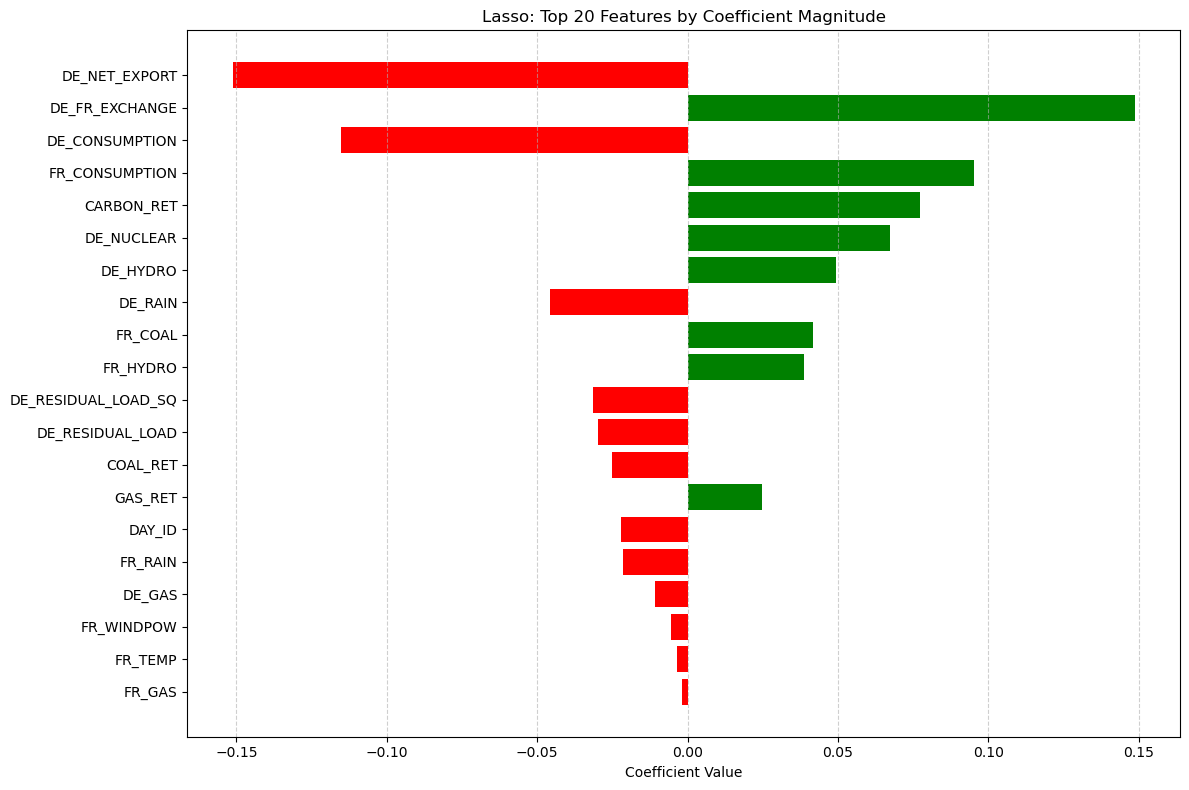

Lasso selected 22 features out of 29
Selected features by Lasso:
                Feature   Coefficient
6         DE_NET_EXPORT -1.512965e-01
4        DE_FR_EXCHANGE  1.486994e-01
2        DE_CONSUMPTION -1.153956e-01
3        FR_CONSUMPTION  9.520823e-02
27           CARBON_RET  7.721458e-02
15           DE_NUCLEAR  6.712586e-02
13             DE_HYDRO  4.948410e-02
20              DE_RAIN -4.577644e-02
12              FR_COAL  4.162676e-02
14             FR_HYDRO  3.874961e-02
28  DE_RESIDUAL_LOAD_SQ -3.150236e-02
19     DE_RESIDUAL_LOAD -2.969166e-02
26             COAL_RET -2.511398e-02
25              GAS_RET  2.466676e-02
1                DAY_ID -2.209355e-02
21              FR_RAIN -2.155924e-02
9                DE_GAS -1.101552e-02
18           FR_WINDPOW -5.527529e-03
24              FR_TEMP -3.660376e-03
10               FR_GAS -1.896344e-03
5        FR_DE_EXCHANGE -5.939607e-17
8         DE_NET_IMPORT  1.933825e-17


In [125]:
# Apply StandardScaler to features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_features)
X_test_scaled = scaler.transform(X_test_features)

# Define column names for the scaled data
feature_names = X_train_features.columns


# Define cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# LASSO Regression with Grid Search
alphas_lasso = [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10]
param_grid_lasso = {'alpha': alphas_lasso}

lasso_grid = GridSearchCV(
    Lasso(max_iter=10000, random_state=1),
    param_grid_lasso,
    cv=kf,
    scoring=spearman_scorer
)
lasso_grid.fit(X_train_scaled, y_train)

print(f"Best Lasso alpha: {lasso_grid.best_params_['alpha']}")
print(f"Best Lasso cross-validation score: {lasso_grid.best_score_:.4f}")

# Ridge Regression with Grid Search
# alphas_ridge = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
alphas_ridge = [200, 500, 1000, 1500, 2000]
param_grid_ridge = {'alpha': alphas_ridge}

ridge_grid = GridSearchCV(
    Ridge(random_state=1),
    param_grid_ridge,
    cv=kf,
    scoring=spearman_scorer
)
ridge_grid.fit(X_train_scaled, y_train)

print(f"Best Ridge alpha: {ridge_grid.best_params_['alpha']}")
print(f"Best Ridge cross-validation score: {ridge_grid.best_score_:.4f}")

# Fit final Lasso model with best alpha
final_lasso = Lasso(alpha=lasso_grid.best_params_['alpha'], max_iter=10000, random_state=42)
final_lasso.fit(X_train_scaled, y_train)

final_ridge = Ridge(alpha=ridge_grid.best_params_['alpha'], max_iter=10000, random_state=42)
final_ridge.fit(X_train_scaled, y_train)

# Get feature importance from Lasso coefficients
lasso_coef = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': final_lasso.coef_
}).sort_values('Coefficient', key=lambda x: abs(x), ascending=False)

# Plot Lasso coefficients (top 20 by magnitude)
plt.figure(figsize=(12, 8))
lasso_top20 = lasso_coef.head(20)
colors = ['green' if c > 0 else 'red' for c in lasso_top20['Coefficient']]
plt.barh(lasso_top20['Feature'], lasso_top20['Coefficient'], color=colors)
plt.title('Lasso: Top 20 Features by Coefficient Magnitude')
plt.xlabel('Coefficient Value')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Count non-zero coefficients
n_selected = np.sum(final_lasso.coef_ != 0)
print(f"Lasso selected {n_selected} features out of {len(feature_names)}")

# Print features with non-zero coefficients
selected_features = lasso_coef[lasso_coef['Coefficient'] != 0]
print("Selected features by Lasso:")
print(selected_features)

In [101]:
# Train the final Ridge model on the full training set
final_ridge_model = Ridge(alpha=ridge_grid.best_params_['alpha'], random_state=42)
final_ridge_model.fit(X_train_scaled, y_train)

# Make predictions on test data
ridge_predictions = final_ridge_model.predict(X_test_scaled)

# Create submission dataframe
ridge_submission = pd.DataFrame({
    'ID': X_test['ID'],
    'TARGET': ridge_predictions
})

# Save submission to CSV
ridge_submission.to_csv('FR_ridge_submission.csv', index=False)

print("Ridge model trained and submission file created!")
print(f"Ridge alpha used: {ridge_grid.best_params_['alpha']}")
print(f"Preview of submission file:")
print(ridge_submission.head())

Ridge model trained and submission file created!
Ridge alpha used: 200
Preview of submission file:
     ID    TARGET
0  1115 -0.054093
1  1202  0.112020
2  1194 -0.131162
3  1084 -0.022960
4  1135 -0.059128


In [102]:
# Filter X_train_features and X_test_features to keep only the features 
# selected by Lasso (non-zero coefficients)
selected_feature_names = lasso_coef[lasso_coef['Coefficient'] != 0]['Feature'].values

# Create new dataframes with only selected features
X_train_features = X_train_features[selected_feature_names]
X_test_features = X_test_features[selected_feature_names]




# # Create a copy of y_train to avoid modifying the original
# y_train_log = y_train.copy()

# # Handle negative values by using sign(y) * log(1 + abs(y))
# # This preserves the sign while applying a logarithmic transformation
# y_train = np.sign(y_train) * np.log1p(np.abs(y_train))





# Hyperparameters tuning

SVR

In [126]:
import optuna
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Apply StandardScaler to features (SVR is sensitive to feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_features)
X_test_scaled = scaler.transform(X_test_features)

# Define the objective function for Optuna
def objective(trial):
    # Define hyperparameters to optimize
    params = {
        'C': trial.suggest_float('C', 0.01, 100.0, log=True),
        'gamma': trial.suggest_categorical('gamma', ['scale', 'auto']) if trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly']) != 'linear' else 'scale',
        'epsilon': trial.suggest_float('epsilon', 0.001, 1.0, log=True),
        'kernel': trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly']),
    }
    
    # Add degree parameter only for polynomial kerne
    
    # Create SVR model with the suggested parameters
    model = SVR(**params)
    
    # Perform cross-validation
    cv_scores = cross_val_score(
        model, 
        X_train_scaled, 
        y_train,
        cv=kf,
        scoring=spearman_scorer
    )
    
    # Return the mean CV score (higher is better)
    return cv_scores.mean()

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=500)  # Adjust n_trials as needed

# Print the best parameters and score
print("Best trial:")
print(f"  Value (Spearman correlation): {study.best_trial.value:.4f}")
print("  Best parameters:")
for key, value in study.best_trial.params.items():
    print(f"    {key}: {value}")

# # Train a final model with the best parameters
# best_params = study.best_trial.params
# best_svr = SVR(**best_params)

# # Perform cross-validation again with the best model to verify performance
# best_cv_scores = cross_val_score(
#     best_svr, 
#     X_train_scaled, 
#     y_train,
#     cv=kf,
#     scoring=spearman_scorer
# )

# print(f"\nCross-validation scores with best model: {best_cv_scores}")
# print(f"Mean score: {best_cv_scores.mean():.4f}")
# print(f"Standard deviation: {best_cv_scores.std():.4f}")


#potential 29.2 {'C': 506.763356566977, 'kernel': 'rbf', 'gamma': 'auto', 'epsilon': 0.0011030512042705693, 'gamma_type': 'numeric', 'gamma_value': 0.00016057694056836086}

[I 2025-05-30 17:13:09,728] A new study created in memory with name: no-name-ce4bacba-8f1e-4e69-948b-4014cd403750
[I 2025-05-30 17:13:09,809] Trial 0 finished with value: 0.1191218106996337 and parameters: {'C': 0.05684065804654123, 'kernel': 'rbf', 'gamma': 'auto', 'epsilon': 0.0016460976185434515}. Best is trial 0 with value: 0.1191218106996337.
[I 2025-05-30 17:13:09,908] Trial 1 finished with value: 0.11363560683588121 and parameters: {'C': 0.13827909108043385, 'kernel': 'rbf', 'gamma': 'auto', 'epsilon': 0.008564349098926366}. Best is trial 0 with value: 0.1191218106996337.
[I 2025-05-30 17:13:10,097] Trial 2 finished with value: 0.08257104801006782 and parameters: {'C': 68.86783387324634, 'kernel': 'poly', 'gamma': 'auto', 'epsilon': 0.10869471685252817}. Best is trial 0 with value: 0.1191218106996337.
[I 2025-05-30 17:13:31,399] Trial 3 finished with value: 0.0988800453900545 and parameters: {'C': 62.58709266203966, 'kernel': 'linear', 'epsilon': 0.06624854492348385}. Best is tr

Best trial:
  Value (Spearman correlation): 0.1726
  Best parameters:
    C: 0.01375384373040411
    kernel: rbf
    gamma: auto
    epsilon: 0.08380622504267245


Catboost

In [11]:
from catboost import CatBoostRegressor

# Define the objective function for Optuna
def objective(trial):
    # Define hyperparameters to optimize
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000, step=100),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.05, log=True),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1.0, 10.0),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'random_strength': trial.suggest_float('random_strength', 1e-9, 10.0, log=True),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'verbose': False,
        'random_seed': 42
    }
    
    # Create CatBoost model with the suggested parameters
    model = CatBoostRegressor(**params)
    
    # Perform cross-validation
    cv_scores = cross_val_score(
        model, 
        X_train_features, 
        y_train,
        cv=kf,
        scoring=spearman_scorer
    )
    
    # Return the mean CV score (higher is better)
    return cv_scores.mean()

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)  # Adjust n_trials as needed

# Print the best parameters and score
print("Best trial:")
print(f"  Value (Spearman correlation): {study.best_trial.value:.4f}")
print("  Best parameters:")
for key, value in study.best_trial.params.items():
    print(f"    {key}: {value}")


[I 2025-05-22 21:34:30,540] A new study created in memory with name: no-name-d125c947-e7ef-4eb9-842f-5ffb5e0ea2f7
[I 2025-05-22 21:34:51,731] Trial 0 finished with value: 0.08289474952225973 and parameters: {'iterations': 700, 'learning_rate': 0.0019045049232684049, 'depth': 10, 'l2_leaf_reg': 7.664683826237081, 'subsample': 0.8659299306190866, 'random_strength': 7.026778985021974e-08, 'border_count': 43, 'bagging_temperature': 0.6401616242745899}. Best is trial 0 with value: 0.08289474952225973.
[I 2025-05-22 21:35:12,848] Trial 1 finished with value: 0.08972563033409417 and parameters: {'iterations': 300, 'learning_rate': 0.0021098140984567816, 'depth': 10, 'l2_leaf_reg': 7.367271664811597, 'subsample': 0.680701744780396, 'random_strength': 3.074583264600199e-07, 'border_count': 86, 'bagging_temperature': 0.20669345311807197}. Best is trial 1 with value: 0.08972563033409417.
[I 2025-05-22 21:35:15,660] Trial 2 finished with value: 0.10022132181510188 and parameters: {'iterations': 60

Best trial:
  Value (Spearman correlation): 0.1321
  Best parameters:
    iterations: 200
    learning_rate: 0.02027057587512212
    depth: 8
    l2_leaf_reg: 1.0406133932054118
    subsample: 0.6853743463033051
    random_strength: 0.002515532453880137
    border_count: 251
    bagging_temperature: 0.005916485782095027


LGBM

In [127]:
import optuna
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
def objective(trial):
    #
    params = {
        'objective': 'regression',
        'metric': 'rmse',  # We'll optimize RMSE, but evaluate with Spearman correlation
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.05, log=True),
        'max_depth': trial.suggest_int('max_depth', 4, 12),
        'num_leaves': trial.suggest_int('num_leaves', 15, 100),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 30),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0, log=True),
        'random_state': 42,
        'verbose': [-1]
    }
    
    # Create model with the specified parameters
    model = LGBMRegressor(**params)
    
    # Cross-validate the model
    cv_scores = cross_val_score(
        model, 
        X_train_features, 
        y_train,
        cv=kf,
        scoring=spearman_scorer
    )
    
    # Return the mean score (higher is better, so no negative sign needed)
    return cv_scores.mean()

# Create an Optuna study to maximize the score
study = optuna.create_study(direction='maximize')

# Run the optimization
study.optimize(objective, n_trials=50)

# Print the best parameters and score
print("Best trial:")
print(f"  Value (Spearman correlation): {study.best_trial.value:.4f}")
print("  Params:")
for key, value in study.best_trial.params.items():
    print(f"    {key}: {value}")

# Train a final model with the best parameters
best_params = study.best_trial.params
best_lgbm = LGBMRegressor(**best_params)

# Perform cross-validation again with the best model to verify performance
best_cv_scores = cross_val_score(
    best_lgbm, 
    X_train_features, 
    y_train,
    cv=kf,
    scoring=spearman_scorer
)

print(f"\nCross-validation scores with best model: {best_cv_scores}")
print(f"Mean score: {best_cv_scores.mean():.4f}")
print(f"Standard deviation: {best_cv_scores.std():.4f}")




[I 2025-05-30 17:14:41,787] A new study created in memory with name: no-name-6beb8b10-3002-47c1-ad82-d59d3b942cfe
[I 2025-05-30 17:14:43,113] Trial 0 finished with value: 0.044136294631822635 and parameters: {'n_estimators': 371, 'learning_rate': 0.001530412806255727, 'max_depth': 10, 'num_leaves': 87, 'subsample': 0.8122904846121495, 'colsample_bytree': 0.7673706029703316, 'min_child_samples': 9, 'reg_alpha': 3.993656821173492e-06, 'reg_lambda': 4.84368579349165e-06}. Best is trial 0 with value: 0.044136294631822635.
[I 2025-05-30 17:14:43,494] Trial 1 finished with value: 0.0623687126879503 and parameters: {'n_estimators': 163, 'learning_rate': 0.024456536609172578, 'max_depth': 11, 'num_leaves': 18, 'subsample': 0.7668690316614889, 'colsample_bytree': 0.7926875599889526, 'min_child_samples': 9, 'reg_alpha': 0.16248481285683317, 'reg_lambda': 0.0001743222525875724}. Best is trial 1 with value: 0.0623687126879503.
[I 2025-05-30 17:14:43,742] Trial 2 finished with value: 0.077791990641

Best trial:
  Value (Spearman correlation): 0.1156
  Params:
    n_estimators: 111
    learning_rate: 0.0012089318435461237
    max_depth: 9
    num_leaves: 94
    subsample: 0.7273166185963879
    colsample_bytree: 0.7435563893398266
    min_child_samples: 15
    reg_alpha: 5.380380399322383e-07
    reg_lambda: 0.0006357226012740091

Cross-validation scores with best model: [-0.02910347  0.08872428  0.09167039  0.13258217  0.21804042]
Mean score: 0.1004
Standard deviation: 0.0798


RandomForest

In [128]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import spearmanr
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer


# Define the objective function for Optuna
def objective(trial):
    # Define hyperparameters to optimize
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('max_depth', 5, 30, step=5)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])
    
    # Create RandomForest model with the suggested hyperparameters
    rf_model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        random_state=42,
        n_jobs=-1
    )
    
    # Use 5-fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # Calculate the cross-validation score using Spearman correlation
    cv_scores = cross_val_score(
        rf_model, 
        X_train_features, 
        y_train,
        cv=kf,
        scoring=spearman_scorer
    )
    
    # Return the mean score to maximize
    return cv_scores.mean()

# Create an Optuna study to maximize the objective function
study = optuna.create_study(direction='maximize')

# Run the optimization with 100 trials
study.optimize(objective, n_trials=50)

# Print the best parameters and score
print("Best parameters:", study.best_params)
print(f"Best cross-validation score: {study.best_value:.4f}")




[I 2025-05-30 17:15:51,906] A new study created in memory with name: no-name-94a0159f-8412-443c-a351-dfa0f58ed7d4
[I 2025-05-30 17:16:15,369] Trial 0 finished with value: 0.07734967376793335 and parameters: {'n_estimators': 700, 'max_depth': 30, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': None, 'bootstrap': False}. Best is trial 0 with value: 0.07734967376793335.
[I 2025-05-30 17:16:23,819] Trial 1 finished with value: 0.04159655933066708 and parameters: {'n_estimators': 300, 'max_depth': 30, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': None, 'bootstrap': False}. Best is trial 0 with value: 0.07734967376793335.
[I 2025-05-30 17:16:26,388] Trial 2 finished with value: 0.14382840556203585 and parameters: {'n_estimators': 300, 'max_depth': 20, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 2 with value: 0.14382840556203585.
[I 2025-05-30 17:16:33,173] Trial 3 finished with value: 0.144359414777

KeyboardInterrupt: 

In [ ]:
{'n_estimators': 500, 'max_depth': 25, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': None, 'bootstrap': True}

# Light GBM


In [5]:

from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer



# Define cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=1)


lgbm_model = LGBMRegressor(
    objective='regression',
    num_leaves=72,
    n_estimators=427,
    max_depth=11,
    subsample=0.6033992520541397,
    colsample_bytree=0.6226700067486994,
    learning_rate=0.001232981254454801,
    min_child_samples=22,
    reg_alpha=2.7888208580323698e-08,
    reg_lambda=0.12130505614763078,
    # feature_fraction=0.6,
    # bagging_fraction=0.8,
    # bagging_freq=5,
    random_state=42
)



# Cross-validate the model using Spearman correlation
cv_scores = cross_val_score(
    lgbm_model, 
    X_train_features, 
    y_train,
    cv=kf,
    scoring=spearman_scorer
)

print("LightGBM Cross-validation scores (Spearman correlation):", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
print("Standard deviation of cross-validation scores:", cv_scores.std())

# Train the final model on the full training set
# final_lgbm_model = LGBMRegressor(
#     objective='regression',
#     n_estimators=100,
#     learning_rate=0.1,
#     max_depth=4,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     random_state=42
# )

# final_lgbm_model.fit(X_train_features, y_train)

# # Make predictions on test data
# lgbm_predictions = final_lgbm_model.predict(X_test_features)

# # Create submission dataframe
# lgbm_submission = pd.DataFrame({
#     'ID': X_test['ID'],
#     'TARGET': lgbm_predictions
# })

# Optional: Save submission to CSV
# lgbm_submission.to_csv('lightgbm_submission.csv', index=False)

# Feature importance
# plt.figure(figsize=(12, 8))
# lgbm_feature_importance = pd.DataFrame({
#     'Feature': X_train_features.columns,
#     'Importance': final_lgbm_model.feature_importances_
# }).sort_values('Importance', ascending=False)

# plt.barh(lgbm_feature_importance['Feature'], lgbm_feature_importance['Importance'])
# plt.xlabel('Importance')
# plt.title('LightGBM Feature Importance')
# plt.gca().invert_yaxis()
# plt.tight_layout()
# plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0,000709 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6577
[LightGBM] [Info] Number of data points in the train set: 680, number of used features: 29
[LightGBM] [Info] Start training from score 0,048177
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

# Catboost

In [13]:
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint


kf = KFold(n_splits=5, shuffle=True, random_state=42)



# Define CatBoost model
catboost_model = CatBoostRegressor(
    iterations=200,  #utilise 200
    learning_rate=0.02027057587512212,
    depth=8,  #utilise 10
    subsample=0.6853743463033051,
    l2_leaf_reg=1.0406133932054118,
    border_count=251,
    random_strength=0.002515532453880137,
    bagging_temperature=0.005916485782095027,
    random_seed=42,
    verbose=False
)

# Cross-validate the model using Spearman correlation
cv_scores = cross_val_score(
    catboost_model, 
    X_train_features, 
    y_train,
    cv=kf,
    scoring=spearman_scorer
)

print("CatBoost Cross-validation scores (Spearman correlation):", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
print("Standard deviation of cross-validation scores:", cv_scores.std())






CatBoost Cross-validation scores (Spearman correlation): [ 0.19311697  0.1399393  -0.00314238  0.19488046  0.13581508]
Mean cross-validation score: 0.13212188658686866
Standard deviation of cross-validation scores: 0.07215291244849854


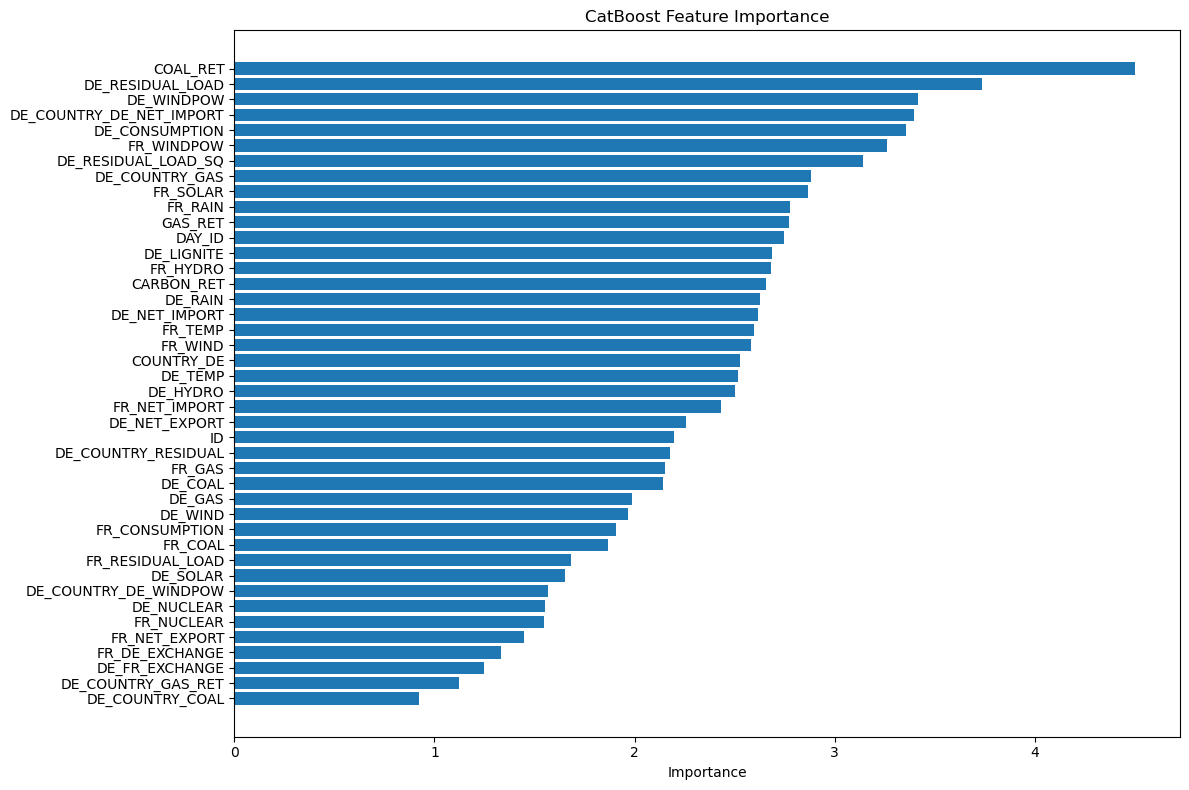

In [51]:
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint


# Train the final model on the full training set
final_catboost_model = CatBoostRegressor(
    iterations=200,
    learning_rate=0.005,
    depth=10,
    subsample=0.9,
    l2_leaf_reg=4,
    random_seed=42,
    verbose=False
)

final_catboost_model.fit(X_train_features, y_train)

# Make predictions on test data
catboost_predictions = final_catboost_model.predict(X_test_features)



# Create submission dataframe
catboost_submission = pd.DataFrame({
    'ID': X_test['ID'],
    'TARGET': catboost_predictions
})

# Optional: Save submission to CSV
catboost_submission.to_csv('catboost_submission.csv', index=False)

# Feature importance
plt.figure(figsize=(12, 8))
feature_importance = pd.DataFrame({
    'Feature': X_train_features.columns,
    'Importance': final_catboost_model.get_feature_importance()
}).sort_values('Importance', ascending=False)

plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('CatBoost Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Random Forest

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import spearmanr


# Define cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=500,
    max_depth=25,
    min_samples_split=9,
    min_samples_leaf=1,
    max_features=None,
    bootstrap=True,
    random_state=42,
    # n_jobs=-1
)
# {'n_estimators': 500, 'max_depth': 25, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': None, 'bootstrap': True}


# Cross-validate the model using Spearman correlation
cv_scores = cross_val_score(
    rf_model, 
    X_train_features, 
    y_train,
    cv=kf,
    scoring=spearman_scorer
)

print("Random Forest Cross-validation scores (Spearman correlation):", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
print("Standard deviation of cross-validation scores:", cv_scores.std())

# Train the final model on the full training set
final_rf_model = RandomForestRegressor(
    n_estimators=500,
    max_depth=25,
    min_samples_split=9,
    min_samples_leaf=1,
    max_features=None,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

final_rf_model.fit(X_train_features, y_train)

# Make predictions on test data
rf_predictions = final_rf_model.predict(X_test_features)

# Create submission dataframe
rf_submission = pd.DataFrame({
    'ID': X_test['ID'],
    'TARGET': rf_predictions
})

# # Feature importance
# plt.figure(figsize=(12, 8))
# rf_feature_importance = pd.DataFrame({
#     'Feature': X_train_features.columns,
#     'Importance': final_rf_model.feature_importances_
# }).sort_values('Importance', ascending=False)

# plt.barh(rf_feature_importance['Feature'][:20], rf_feature_importance['Importance'][:20])
# plt.xlabel('Importance')
# plt.title('Random Forest Top 20 Feature Importance')
# plt.gca().invert_yaxis()
# plt.tight_layout()
# plt.show()

# Optional: Save submission to CSV
rf_submission.to_csv('FR_random_forest_submission.csv', index=False)

Random Forest Cross-validation scores (Spearman correlation): [ 0.216344    0.1630437  -0.00230702  0.24969208  0.19529692]
Mean cross-validation score: 0.16441393754076886
Standard deviation of cross-validation scores: 0.08800069022073258


# SVR

In [9]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

kf = KFold(n_splits=5, shuffle=True, random_state=8)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_features)
X_test_scaled = scaler.transform(X_test_features)

# Since we already have scaled data (X_train_scaled, X_test_scaled), we can use them directly
# If not scaled, we would need to scale the data as SVR is sensitive to feature scaling

# Define parameter grid for SVR
# param_grid_svr = {
#     'C': [0.1, 1, 10, 100],
#     'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
#     'epsilon': [0.01, 0.1, 0.2, 0.5],
#     'kernel': ['rbf', 'linear', 'poly']
# }

# #parameters for exo+non exo
# param_grid_svr = {
#     'C': [0.011878636946151962],
#     'gamma': ['scale'],
#     'epsilon': [0.08317344449802504],
#     'kernel': ['linear']
# }

#parameters for non exo
param_grid_svr = {
    'C': [0.01375384373040411],
    'gamma': ['auto'],
    'epsilon': [0.08380622504267245],
    'kernel': ['rbf']
}

  
    
# Create SVR model
svr_model = SVR()

# Perform grid search with cross-validation
svr_grid = GridSearchCV(
    svr_model,
    param_grid_svr,
    cv=kf,
    scoring=spearman_scorer,
    n_jobs=-1,
    verbose=1
)

# Fit the model
svr_grid.fit(X_train_scaled, y_train)

# Print best parameters and score
print("Best SVR parameters:")
print(svr_grid.best_params_)
print(f"Best SVR cross-validation score: {svr_grid.best_score_:.4f}")

# Train final SVR model with best parameters
final_svr = SVR(**svr_grid.best_params_)
final_svr.fit(X_train_scaled, y_train)

# # Make predictions on test data
# svr_predictions = final_svr.predict(X_test_scaled)

# # Create submission dataframe
# svr_submission = pd.DataFrame({
#     'ID': X_test['ID'],
#     'TARGET': svr_predictions
# })

# # Save submission to CSV
# svr_submission.to_csv('DE_svr_submission.csv', index=False)

# print("\nSVR model trained and submission file created!")
# print(f"Preview of submission file:")
# print(svr_submission.head())

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best SVR parameters:
{'C': 0.01375384373040411, 'epsilon': 0.08380622504267245, 'gamma': 'auto', 'kernel': 'rbf'}
Best SVR cross-validation score: 0.1853


SVR(C=0.01375384373040411, epsilon=0.08380622504267245, gamma='auto')

In [134]:
# Make predictions on test data
svr_predictions = final_svr.predict(X_test_scaled)

# Create submission dataframe
svr_submission = pd.DataFrame({
    'ID': X_test['ID'],
    'TARGET': svr_predictions
})

# Save submission to CSV
svr_submission.to_csv('FR_nonexo_svr_submission.csv', index=False)

print("\nSVR model trained and submission file created!")
print(f"Preview of submission file:")
print(svr_submission.head())




SVR model trained and submission file created!
Preview of submission file:
      ID    TARGET
38  2028  0.019422
39  1746  0.015544
40  1608 -0.016623
41  1356 -0.057758
42  2008 -0.034844


# Test features engineering

In [27]:
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import uniform, randint
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor



kf = KFold(n_splits=5, shuffle=True, random_state=5)



# Define CatBoost model
catboost_model = CatBoostRegressor(
    iterations=100,  #utilise 200
    learning_rate=0.029778221049545684,
    depth=4,  #utilise 10
    subsample=0.6924136021544216,
    l2_leaf_reg=5.007455697346183,
    border_count=34,
    random_strength=0.051437686057850714,
    bagging_temperature=0.47359417746471466,
    random_seed=42,
    verbose=False)

# Cross-validate the model using Spearman correlation
cv_scores = cross_val_score(
    catboost_model, 
    X_train_features, 
    y_train,
    cv=kf,
    scoring=spearman_scorer
)



# Define key variables important for electricity price prediction

# 1. Linear Regression using all features
lin_reg_all = LinearRegression()

lin_reg_all_scores = cross_val_score(
    lin_reg_all, 
    X_train_features, 
    y_train,
    cv=kf,
    scoring=spearman_scorer
)



# 2. Using LightGBM with optimized parameters
lgbm_model_opt = LGBMRegressor(
    objective='regression',
    num_leaves=66,
    n_estimators=395,
    max_depth=11,
    subsample=0.6492490940281487,
    colsample_bytree=0.6691972146849207,
    learning_rate=0.005645533719217677,
    min_child_samples=12,
    reg_alpha=3.230686740318781e-06,
    reg_lambda=1.4073630776519119e-08,
    # feature_fraction=0.6,
    # bagging_fraction=0.8,
    # bagging_freq=5,
    verbose=-1,
    random_state=42
)

lgbm_scores = cross_val_score(
    lgbm_model_opt, 
    X_train_features, 
    y_train,
    cv=kf,
    scoring=spearman_scorer
)
# rf model
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=30,
    min_samples_split=3,
    min_samples_leaf=5,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    # n_jobs=-1
)


# Cross-validate the model using Spearman correlation
rf_scores = cross_val_score(
    rf_model, 
    X_train_features, 
    y_train,
    cv=kf,
    scoring=spearman_scorer
)

mean_scores = np.mean([lin_reg_all_scores.mean(), lgbm_scores.mean(), rf_scores.mean(), cv_scores.mean()])


# Print performance metrics
print("\n=== MODEL PERFORMANCE ===")
print(f"Linear Regression (All Features) CV mean score: {lin_reg_all_scores.mean():.4f} ± {lin_reg_all_scores.std():.4f}")
print(f"LightGBM CV mean score: {np.mean(lgbm_scores):.4f} ± {np.std(lgbm_scores):.4f}")
print(f"RF CV mean score: {np.mean(rf_scores):.4f} ± {np.std(rf_scores):.4f}")
print("Mean cross-validation score:", cv_scores.mean())

print("Mean cross-validation score for all models:", mean_scores)



=== MODEL PERFORMANCE ===
Linear Regression (All Features) CV mean score: 0.1434 ± 0.0550
LightGBM CV mean score: 0.1130 ± 0.0910
RF CV mean score: 0.1360 ± 0.0818
Mean cross-validation score: 0.08668555879389214
Mean cross-validation score for all models: 0.11976182328536814


# TEst

In [37]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# # Apply StandardScaler to features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_features)
# X_test_scaled = scaler.transform(X_test_features)



# X_train_features = X_train.drop(['COUNTRY'], axis=1).fillna(0)
# X_test_features = X_test.drop(['COUNTRY'], axis=1).fillna(0)

# Train linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_features, y_train)

# Make predictions on test data
lin_reg_predictions = lin_reg.predict(X_test_features)

# Create submission dataframe
lin_reg_submission = pd.DataFrame({
    'ID': X_test['ID'],
    'TARGET': lin_reg_predictions
})

# Save submission to CSV
lin_reg_submission.to_csv('linear_regression_submission.csv', index=False)

print("Linear Regression model trained and submission file created!")
print(f"Preview of submission file:")
print(lin_reg_submission.head())

Linear Regression model trained and submission file created!
Preview of submission file:
     ID    TARGET
0  1115 -0.016400
1  1202  0.076186
2  1194 -0.083498
3  1084 -0.151095
4  1135 -0.074082
